# Método de Adams-Bashforth-Moulton (ABM) para EDOs

Este notebook implementa el método predictor-corrector de Adams-Bashforth-Moulton (ABM) para resolver una ecuación diferencial ordinaria (EDO) del tipo:

$$ y'(t) = \frac{t - y}{2}, \quad y(0) = 1 $$

Se compara la solución numérica con la solución exacta:

$$ y(t) = 3e^{-t/2} - 2 + t $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de la función f(t, y)

Esta función define el lado derecho de la EDO: $f(t, y) = \frac{t - y}{2}$.

In [2]:
def f(t, y):
    return (t - y) / 2.0

## Implementación del método de Runge-Kutta de orden 4 (RK4)

Este método se utiliza para calcular los tres primeros valores necesarios para iniciar el método ABM.

In [3]:
def rk4(t, yy, h):
    for i in range(0, 3):
        t_i = h * i
        k0 = h * f(t_i, yy[i])
        k1 = h * f(t_i + h/2., yy[i] + k0/2.)
        k2 = h * f(t_i + h/2., yy[i] + k1/2.)
        k3 = h * f(t_i + h, yy[i] + k2)
        yy[i + 1] = yy[i] + (1./6.) * (k0 + 2.*k1 + 2.*k2 + k3)
    return yy[3]

## Método ABM: Adams-Bashforth-Moulton

Este método usa una combinación predictor-corrector para resolver la EDO. Usa los tres primeros valores calculados con RK4 y luego aplica el método de 4 pasos.

In [4]:
def ABM(a, b, N):
    h = (b - a) / N
    t = np.zeros(N + 1)
    y = np.zeros(N + 1)
    yy = np.zeros(4)

    t[0] = a
    y[0] = 1.0
    F0 = f(t[0], y[0])

    for k in range(1, 4):
        t[k] = a + k * h

    y[1] = rk4(t[1], y, h)
    y[2] = rk4(t[2], y, h)
    y[3] = rk4(t[3], y, h)

    F1 = f(t[1], y[1])
    F2 = f(t[2], y[2])
    F3 = f(t[3], y[3])

    h2 = h / 24.0

    for k in range(3, N):
        p = y[k] + h2 * (-9. * F0 + 37. * F1 - 59. * F2 + 55. * F3)
        t[k + 1] = a + h * (k + 1)
        F4 = f(t[k + 1], p)
        y[k + 1] = y[k] + h2 * (F1 - 5. * F2 + 19. * F3 + 9. * F4)

        F0, F1, F2, F3 = F1, F2, F3, f(t[k + 1], y[k + 1])

    return t, y

## Ejecución del método ABM y cálculo de la solución exacta

Se ejecuta el método ABM con $N=24$ pasos en el intervalo $[0, 3]$ y se calcula también la solución exacta para comparar.

In [5]:
A = 0
B = 3
n = 24

t, y_num = ABM(A, B, n)
y_exact = 3 * np.exp(-t / 2.0) - 2 + t

## Gráfica comparativa de la solución numérica y la solución exacta

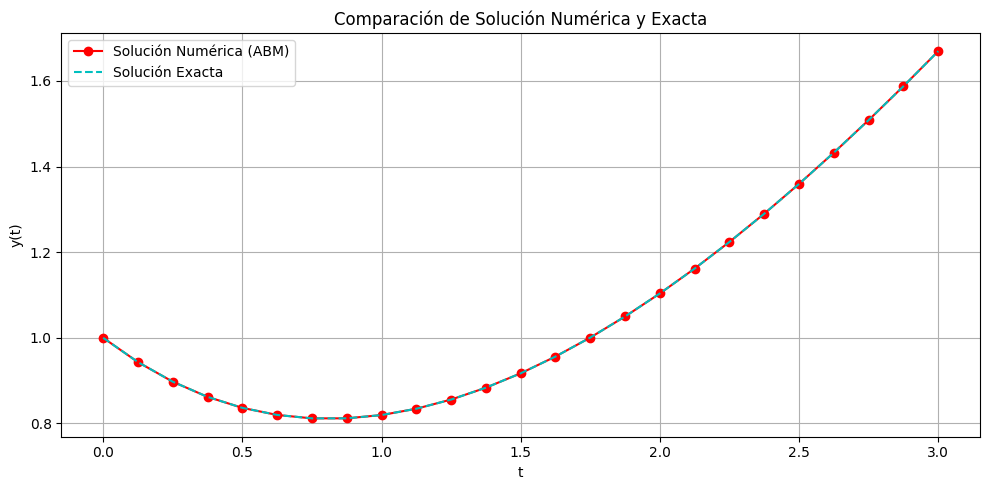

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(t, y_num, 'ro-', label='Solución Numérica (ABM)')
plt.plot(t, y_exact, 'c--', label='Solución Exacta')
plt.title('Comparación de Solución Numérica y Exacta')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()